<a href="https://colab.research.google.com/github/NalchajyanHayk/Molecule-Toxicity-Classifier/blob/main/Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""
Installs the RDKit library using pip.

RDKit is an open-source toolkit for cheminformatics, commonly used for molecular modeling,
chemical informatics, and computational chemistry tasks.

Notes:
- RDKit requires specific dependencies. Ensure your environment satisfies the prerequisites before installation.
- In environments like Google Colab, RDKit may not be installable directly via pip. Consider alternative methods, such as using conda or prebuilt packages.

Command:
!pip install rdkit

Usage:
Execute this command in a Python environment with pip support to install the RDKit package.
"""

!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.3/33.3 MB 10.0 MB/s eta 0:00:00


In [3]:
"""
Imports essential libraries for data manipulation, numerical computations, and cheminformatics.

Modules:
- pandas (imported as pd): A powerful library for data manipulation and analysis, providing DataFrame and Series objects.
- numpy (imported as np): A library for numerical computations, offering support for arrays, matrices, and mathematical functions.
- rdkit.Chem: The core module of RDKit for chemical informatics tasks, including handling molecular representations.
- rdkit.Chem.AllChem: A submodule of RDKit providing advanced functions for molecular manipulations, such as 3D geometry optimization and pharmacophore modeling.

Usage:
- Use `pd` for creating and manipulating tabular data structures.
- Use `np` for numerical operations, such as array creation and mathematical transformations.
- Use `Chem` and `AllChem` for handling molecular data and performing cheminformatics tasks.
"""

import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem

In [19]:
"""
Downloads dataset files required for the Molecule Toxicity Classifier project using wget.

Files:
1. test_names_labels.csv:
   - Contains test dataset labels with molecule names and associated toxicity information.
   - Downloaded from the project's GitHub repository and saved as `test_names_labels.csv`.

2. test_names_smiles.csv:
   - Contains test dataset molecular representations in SMILES (Simplified Molecular Input Line Entry System) format.
   - Downloaded from the project's GitHub repository and saved as `test_names_smiles.csv`.

3. train_names_labels.csv:
   - Contains training dataset labels with molecule names and associated toxicity information.
   - Downloaded from the project's GitHub repository and saved as `train_names_labels.csv`.

4. train_names_smiles.csv:
   - Contains training dataset molecular representations in SMILES format.
   - Downloaded from the project's GitHub repository and saved as `train_names_smiles.csv`.

Commands:
- Each file is downloaded using the `wget` utility and saved to the local environment with the `-O` option specifying the output filename.

Usage:
Run these commands in a shell or a notebook environment that supports shell commands to download and prepare the required dataset files.
"""

!wget https://raw.githubusercontent.com/NalchajyanHayk/Molecule-Toxicity-Classifier/main/test_names_labels.csv -O test_names_labels.csv

!wget https://raw.githubusercontent.com/NalchajyanHayk/Molecule-Toxicity-Classifier/main/test_names_smiles.csv -O test_names_smiles.csv

!wget https://raw.githubusercontent.com/NalchajyanHayk/Molecule-Toxicity-Classifier/main/train_names_labels.csv -O train_names_labels.csv

!wget https://raw.githubusercontent.com/NalchajyanHayk/Molecule-Toxicity-Classifier/main/train_names_smiles.csv -O train_names_smiles.csv


--2025-01-04 10:42:47--  https://raw.githubusercontent.com/NalchajyanHayk/Molecule-Toxicity-Classifier/main/test_names_labels.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5050 (4.9K) [text/plain]
Saving to: ‘test_names_labels.csv’

test_names_labels.c 100%[===================>]   4.93K  --.-KB/s    in 0s      

2025-01-04 10:42:48 (67.7 MB/s) - ‘test_names_labels.csv’ saved [5050/5050]

--2025-01-04 10:42:48--  https://raw.githubusercontent.com/NalchajyanHayk/Molecule-Toxicity-Classifier/main/test_names_smiles.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sen

In [20]:
"""
Loads training dataset files into pandas DataFrames.

1. train_data_names:
   - Reads the `train_names_smiles.csv` file, which contains the molecular structures in SMILES format for the training dataset.
   - Stored as a pandas DataFrame for further processing.

2. train_data_smiles:
   - Reads the `train_names_labels.csv` file, which contains the training dataset labels, including molecule names and their associated toxicity information.
   - Stored as a pandas DataFrame for further analysis.

Usage:
- The DataFrames `train_data_names` and `train_data_smiles` can now be used for further analysis, data preprocessing, or model training tasks.
"""

train_data_names = pd.read_csv("train_names_smiles.csv")
train_data_smiles = pd.read_csv("train_names_labels.csv")

In [21]:
"""
Loads test dataset files into pandas DataFrames.

1. test_data_names:
   - Reads the `test_names_smiles.csv` file, which contains the molecular structures in SMILES format for the test dataset.
   - Stored as a pandas DataFrame for further processing.

2. test_data_smiles:
   - Reads the `test_names_labels.csv` file, which contains the test dataset labels, including molecule names and their associated toxicity information.
   - Stored as a pandas DataFrame for further analysis.

Usage:
- The DataFrames `test_data_names` and `test_data_smiles` can now be used for model evaluation, testing, or further analysis.
"""

test_data_names = pd.read_csv("test_names_smiles.csv")
test_data_smiles = pd.read_csv("test_names_labels.csv")

# New Section

In [22]:
"""
Merges the training dataset by combining molecular structures with their corresponding labels.

- `train_data_names`: DataFrame containing molecular structures in SMILES format for the training dataset.
- `train_data_smiles`: DataFrame containing the training dataset labels, including molecule names and toxicity information.
- The `merge` operation joins these two DataFrames on the 'name' column, ensuring that only rows with matching molecule names from both datasets are included.
- The `how='inner'` parameter specifies an inner join, meaning only molecules present in both datasets will be kept.

Result:
- The merged DataFrame `merged_train` contains both the molecular structures and toxicity labels for the training dataset.
"""

merged_train = pd.merge(train_data_names, train_data_smiles, on='name', how='inner')
merged_train

,name,smiles,toxicity
0,NCGC00260230-01,F[P-](F)(F)(F)(F)F.CCCC[N+]1=CC=CC(C)=C1,0
1,NCGC00184995-01,[H][C@@]12CC[C@H](OP(O)(O)=O)[C@@]1(C)CC[C@]3(...,1
2,NCGC00260471-01,[O-][N+](=O)C1=CC=C2NN=CC2=C1,0
3,NCGC00256746-01,CCC1=NC=CN=C1C,0
4,NCGC00183024-01,CCCN(CCC)C(=O)C(CCC(=O)OCCCN1CCN(CCOC(=O)CC2=C...,1
...,...,...,...
7692,NCGC00182048-01,CCCCCCCCCCCCCCCC(=O)OCCC1CCN(CCCN2C3=C(SC4=C2C...,0
7693,NCGC00257224-01,C[Si]1(C)O[Si](C)(C)O[Si](C)(C)O[Si](C)(C)O[Si...,0
7694,NCGC00258675-01,CCCCCCC1=CC=C(C=C1)C2=CC=C(C=C2)C#N,0
7695,NCGC00167522-01,OS(O)(=O)=O.OC(CNCCCCCCNCC(O)C1=CC=C(O)C(O)=C1...,0


In [23]:
"""
Merges the test dataset by combining molecular structures with their corresponding labels.

- `test_data_names`: DataFrame containing molecular structures in SMILES format for the test dataset.
- `test_data_smiles`: DataFrame containing the test dataset labels, including molecule names and toxicity information.
- The `merge` operation joins these two DataFrames on the 'name' column, ensuring that only rows with matching molecule names from both datasets are included.
- The `how='inner'` parameter specifies an inner join, meaning only molecules present in both datasets will be kept.

Result:
- The merged DataFrame `merged_test` contains both the molecular structures and toxicity labels for the test dataset.
"""

merged_test = pd.merge(test_data_names, test_data_smiles, on='name', how='inner')
merged_test

,name,smiles,toxicity
0,NCGC00261443-01,CNC1=C2N=CN([C@@H]3O[C@H](CO)C(O)[C@H]3O)C2=NC=N1,0
1,NCGC00261600-01,OC1=CC(\C=C\C2=CC=C(O)C(O)=C2)=CC(O)=C1,1
2,NCGC00260926-01,[Cl-].COC1=CC=C2C3=CC=C4C=C5OCOC5=CC4=C3[N+](C...,0
3,NCGC00261266-01,Br.CC1=C(CC(N)C(O)=O)C(O)=NO1,0
4,NCGC00261559-01,C1C(CC2=C1C=CC=C2)N3CCN(CC3)C4=CC=CC5=C4OCCO5,0
...,...,...,...
260,NCGC00261317-01,COC1=C(O)C=CC(CC(O)=O)=C1,0
261,NCGC00261138-01,CCCCCCN(CCCCCC)C(=O)CC1=C(NC2=C1C=CC=C2)C3=CC=...,0
262,NCGC00261292-01,Cl.NCCC1=CNC2=C1C=C(O)C=C2,0
263,NCGC00260828-01,CC(\C=C\C=C(C)\C=C\C1=C(C)C(O)C(=O)CC1(C)C)=C\...,0


In [24]:
"""
Balances the training dataset by augmenting the number of toxic molecules to match the number of non-toxic molecules.

1. Separates toxic and non-toxic molecules from the merged training data using the 'toxicity' label.
2. Determines the augmentation factor by calculating how many additional toxic samples are needed to match the number of non-toxic samples.
3. Duplicates the toxic molecules by the calculated augmentation factor to create a larger set of toxic samples.
4. Trims the duplicated toxic molecules to match the size of the non-toxic molecules.
5. Merges the non-toxic molecules with the duplicated toxic molecules to create a balanced training dataset.
6. Optionally shuffles the dataset to ensure randomness in the order of samples.

Result:
- The `merged_train` DataFrame now contains a balanced set of toxic and non-toxic molecules, ready for model training.
"""

toxic_molecules = merged_train[merged_train['toxicity'] == 1]
non_toxic_molecules = merged_train[merged_train['toxicity'] == 0]

num_non_toxic = len(non_toxic_molecules)
num_toxic = len(toxic_molecules)
augmentation_factor = (num_non_toxic // num_toxic) + 1

duplicated_toxic = pd.concat([toxic_molecules] * augmentation_factor, ignore_index=True)

duplicated_toxic = duplicated_toxic.sample(n=num_non_toxic, random_state=42).reset_index(drop=True)

merged_train = pd.concat([non_toxic_molecules, duplicated_toxic], ignore_index=True)

merged_train = merged_train.sample(frac=1, random_state=42).reset_index(drop=True)

In [25]:
merged_train

,name,smiles,toxicity
0,NCGC00254275-01,OC1=CC=C(C=C1)C2=COC3=C(C(O)=CC(O)=C3)C2=O,1
1,NCGC00260450-01,CC(C)(C)OC(=O)C1=CC(N)=CC=C1,1
2,NCGC00259292-01,OC1=CC=C(C=C1)S(=O)(=O)C2=CC=C(O)C=C2,1
3,NCGC00254908-01,[Na+].CCCCCCCCCOS([O-])(=O)=O,1
4,NCGC00255148-01,CC(C)CCCCCOC(=O)CCCCC(=O)OCCCCCC(C)C,0
...,...,...,...
13515,NCGC00256819-01,CC(C)COC(=O)C=CC1=CC=CC=C1,0
13516,NCGC00257880-01,C(SCC1=CC=CC=C1)C2=CC=CC=C2,1
13517,NCGC00258174-01,NC1=CC=C(F)C=C1F,0
13518,NCGC00181788-01,Cl.[H][C@@]2(NC(=O)C(=N\OC)\C1=CSC(N)=N1)C(=O)...,0


In [26]:
len(merged_train[merged_train['toxicity'] == 0])

6760

In [27]:
def generate_fingerprint(smiles: str, radius=2, n_bits=2048):
    """
    Converts a list of SMILES strings to ECFP fingerprints.

    Parameters:
        smiles (str): SMILES of a molecule.
        radius (int): Radius parameter for Morgan fingerprint. ECFP4 corresponds to radius=2.
        n_bits (int): Size of the fingerprint bit vector.

    Returns:
        np.ndarray: Array of fingerprint vectors.
    """
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None  # Handle invalid SMILES gracefully
    generator = AllChem.GetMorganGenerator(radius=radius, fpSize=n_bits)
    fingerprint = generator.GetFingerprint(mol)
    return np.array(fingerprint)

merged_train['fingerprint'] = merged_train['smiles'].apply(lambda x: generate_fingerprint(x))
merged_test['fingerprint'] = merged_test['smiles'].apply(lambda x: generate_fingerprint(x))

merged_train


[10:43:24] Explicit valence for atom # 0 Cl, 1, is greater than permitted
[10:43:32] WARNING: not removing hydrogen atom without neighbors
[10:43:35] Explicit valence for atom # 2 Cl, 1, is greater than permitted
[10:43:37] SMILES Parse Error: syntax error while parsing: smiles
[10:43:37] SMILES Parse Error: Failed parsing SMILES 'smiles' for input: 'smiles'


,name,smiles,toxicity,fingerprint
0,NCGC00254275-01,OC1=CC=C(C=C1)C2=COC3=C(C(O)=CC(O)=C3)C2=O,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,NCGC00260450-01,CC(C)(C)OC(=O)C1=CC(N)=CC=C1,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,NCGC00259292-01,OC1=CC=C(C=C1)S(=O)(=O)C2=CC=C(O)C=C2,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,NCGC00254908-01,[Na+].CCCCCCCCCOS([O-])(=O)=O,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
4,NCGC00255148-01,CC(C)CCCCCOC(=O)CCCCC(=O)OCCCCCC(C)C,0,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
...,...,...,...,...
13515,NCGC00256819-01,CC(C)COC(=O)C=CC1=CC=CC=C1,0,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
13516,NCGC00257880-01,C(SCC1=CC=CC=C1)C2=CC=CC=C2,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
13517,NCGC00258174-01,NC1=CC=C(F)C=C1F,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
13518,NCGC00181788-01,Cl.[H][C@@]2(NC(=O)C(=N\OC)\C1=CSC(N)=N1)C(=O)...,0,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [28]:
"""
Imports essential libraries for deep learning, optimization, and model evaluation.

Modules:
- torch: The core PyTorch library, used for tensor operations and deep learning models.
- torch.nn: A module from PyTorch that provides classes and functions to build and train neural networks.
- torch.optim: A module in PyTorch that provides optimization algorithms, such as Adam, SGD, etc., for model training.
- torch.utils.data: A PyTorch module containing utilities to manage datasets, including the `DataLoader` and `TensorDataset` classes.
- sklearn.model_selection: Contains functions like `train_test_split` to split datasets into training and testing sets.
- sklearn.metrics: Provides functions for evaluating model performance, such as `accuracy_score` and `roc_auc_score`.

Usage:
- Use `torch` for tensor-based computations and deep learning tasks.
- Use `torch.nn` to define neural network architectures.
- Use `torch.optim` for applying optimization algorithms during training.
- Use `DataLoader` and `TensorDataset` for handling datasets and batching in PyTorch.
- Use `train_test_split` to split datasets for training and testing.
- Use `accuracy_score` and `roc_auc_score` to evaluate model performance.
"""

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

In [29]:
"""
    Defines the ImprovedCNN1DModel class, a 1D Convolutional Neural Network (CNN) for sequence data classification.

    This model uses multiple convolutional layers followed by batch normalization, ReLU activation, max pooling,
    and dropout for regularization. It includes fully connected layers at the end to produce a final output,
    which is passed through a sigmoid activation for binary classification.

    Architecture:
    - Convolutional Layers:
      - conv1: 1D convolution with 32 output channels, kernel size of 5, and padding of 2.
      - conv2: 1D convolution with 64 output channels, kernel size of 5, and padding of 2.
      - conv3: 1D convolution with 128 output channels, kernel size of 3, and padding of 1.
    - Batch Normalization:
      - bn1, bn2, bn3: Batch normalization applied after each convolutional layer.
    - Max Pooling and Dropout:
      - Pooling layer with a factor of 2.
      - Dropout layer applied after each convolutional and fully connected layer to prevent overfitting.
    - Fully Connected Layers:
      - fc1: Linear layer with 256 units.
      - fc2: Linear layer with 128 units.
      - fc3: Final output layer with a single unit, passed through a sigmoid activation function for binary classification.

    Parameters:
    - `input_length`: The length of the input sequence (for calculating the size of the fully connected layer input).
    - `dropout_rate`: Dropout rate for regularization (default is 0.3).

    Usage:
    - This model is suitable for sequence data classification tasks (e.g., toxicity prediction based on molecular structure).
    - The `forward` method defines the forward pass, with the input being a batch of sequences.
    """

class ImprovedCNN1DModel(nn.Module):
    def __init__(self, input_length, dropout_rate=0.3):
        super(ImprovedCNN1DModel, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=32, kernel_size=5, padding=2)
        self.bn1 = nn.BatchNorm1d(32)
        self.conv2 = nn.Conv1d(in_channels=32, out_channels=64, kernel_size=5, padding=2)
        self.bn2 = nn.BatchNorm1d(64)
        self.conv3 = nn.Conv1d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm1d(128)
        self.pool = nn.MaxPool1d(2)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=dropout_rate)

        # Calculate input size for the fully connected layer
        self.fc1_input_size = 128 * (input_length // 8)
        self.fc1 = nn.Linear(self.fc1_input_size, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 1)

    def forward(self, x):
        x = x.unsqueeze(1)  # Add channel dimension
        x = self.pool(self.relu(self.bn1(self.conv1(x))))
        x = self.dropout(x)
        x = self.pool(self.relu(self.bn2(self.conv2(x))))
        x = self.dropout(x)
        x = self.pool(self.relu(self.bn3(self.conv3(x))))
        x = self.dropout(x)
        x = x.view(x.size(0), -1)  # Flatten
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return torch.sigmoid(x).squeeze()


In [30]:
# Function to train the CNN
def train_cnn(X_train, y_train, input_length, num_epochs=20, batch_size=32, learning_rate=0.001, dropout_rate=0.3):
    """
    Trains the ImprovedCNN1DModel using the provided training data.

    This function prepares the input data, initializes the model, and then performs training using the Adam optimizer.
    The model is trained for a specified number of epochs and prints the average loss at the end of each epoch.

    Parameters:
    - `X_train`: Training data (features) as a NumPy array or Tensor.
    - `y_train`: Training labels as a NumPy array or Tensor.
    - `input_length`: Length of the input sequences for the model.
    - `num_epochs`: Number of epochs to train the model (default is 20).
    - `batch_size`: Size of the mini-batch for training (default is 32).
    - `learning_rate`: Learning rate for the optimizer (default is 0.001).
    - `dropout_rate`: Dropout rate for regularization (default is 0.3).

    Returns:
    - `model`: The trained ImprovedCNN1DModel instance.
    """

    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    model = ImprovedCNN1DModel(input_length=input_length, dropout_rate=dropout_rate)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    model.train()
    for epoch in range(num_epochs):
        epoch_loss = 0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss/len(train_loader):.4f}")

    return model


In [31]:
from sklearn.model_selection import train_test_split

valid_fingerprints = merged_train['fingerprint'].apply(lambda x: isinstance(x, np.ndarray) or isinstance(x, list))

filtered_df = merged_train[valid_fingerprints].copy()

X_train = np.array(filtered_df['fingerprint'].tolist())
y_train = filtered_df['toxicity'].values

X_test = np.array(merged_test['fingerprint'].tolist())
y_test = merged_test['toxicity'].values

input_length = X_train.shape[1]
model = train_cnn(X_train, y_train, input_length=input_length, num_epochs=20)

model.eval()
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

with torch.no_grad():
    predictions = model(X_test_tensor).numpy()

binary_predictions = (predictions > 0.5).astype(int)

Epoch [1/20], Loss: 0.6159
Epoch [2/20], Loss: 0.4833
Epoch [3/20], Loss: 0.3943
Epoch [4/20], Loss: 0.3173
Epoch [5/20], Loss: 0.2749
Epoch [6/20], Loss: 0.2490
Epoch [7/20], Loss: 0.2278
Epoch [8/20], Loss: 0.2160
Epoch [9/20], Loss: 0.2069
Epoch [10/20], Loss: 0.1957
Epoch [11/20], Loss: 0.1853
Epoch [12/20], Loss: 0.1887
Epoch [13/20], Loss: 0.1794
Epoch [14/20], Loss: 0.1703
Epoch [15/20], Loss: 0.1599
Epoch [16/20], Loss: 0.1605
Epoch [17/20], Loss: 0.1591
Epoch [18/20], Loss: 0.1522
Epoch [19/20], Loss: 0.1570
Epoch [20/20], Loss: 0.1488


In [34]:
from sklearn.metrics import f1_score

# Calculate Accuracy, ROC-AUC, and F1 Score
accuracy = accuracy_score(y_test, binary_predictions)
roc_auc = roc_auc_score(y_test, predictions)
f1 = f1_score(y_test, binary_predictions)

"""
Calculates and prints the performance metrics for the trained model on the test data:
- Accuracy: Measures the proportion of correctly predicted labels.
- ROC-AUC: Measures the area under the receiver operating characteristic curve, providing insight into the model's ability to discriminate between classes.
- F1 Score: The harmonic mean of precision and recall, providing a balance between the two.

Parameters:
- `y_test`: The true labels of the test dataset.
- `binary_predictions`: The predicted binary labels (0 or 1) by the model.
- `predictions`: The predicted probabilities (continuous values between 0 and 1) by the model.

Outputs:
- Prints the calculated accuracy, ROC-AUC, and F1 score.
"""
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.8415
ROC-AUC: 0.6707
F1 Score: 0.2500


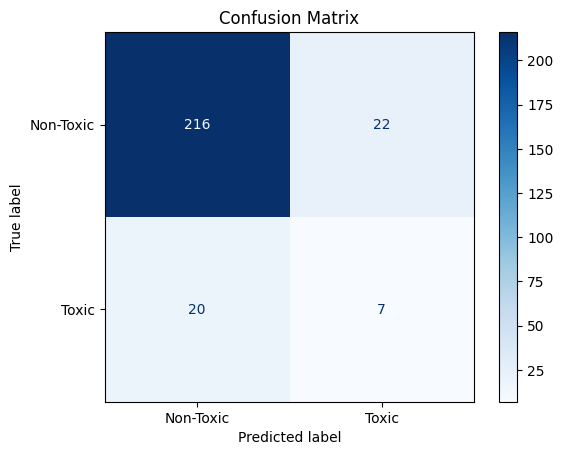

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(y_test, binary_predictions)

"""
Calculates and displays the confusion matrix for the predictions made by the model.
The confusion matrix is used to evaluate the performance of the classification model by comparing
the true labels with the predicted labels. It shows the counts of true positives, true negatives,
false positives, and false negatives.

Parameters:
- `y_test`: The true labels of the test dataset.
- `binary_predictions`: The predicted binary labels (0 or 1) by the model.

Outputs:
- Prints the confusion matrix and plots it using a heatmap.
"""
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Toxic", "Toxic"])
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix")
plt.show()
